<a href="https://colab.research.google.com/github/Ankita002/API-1/blob/master/Copy_of_Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://cb.lk/covid_19

--2020-08-10 10:50:42--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-08-10 10:50:43--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-08-10 10:50:44--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-08-10 10:50:45--  https://www.dropbox.com/s/raw/7rjw

In [ ]:
!unzip "/content/covid_19"

Archive:  /content/covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
  

In [ ]:
x=Flatten()(vgg.output) 
pred = Dense(2, activation='softmax')(x)

In [ ]:
m6=Model(inputs=vgg.input, outputs=pred)

In [ ]:
m6.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
m6.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=True )

test_datagen = ImageDataGenerator(rescale = 1./255 )

training_gen = train_datagen.flow_from_directory('/content/CovidDataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_gen = test_datagen.flow_from_directory('/content/CovidDataset/Val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)



Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
h1=m6.fit(
  training_gen,
  validation_data=test_gen,
  epochs=5,  steps_per_epoch=len(training_gen),
  validation_steps=len(test_gen)

)

Epoch 1/5
7/7 [==============================] - 133s 19s/step - loss: 0.7637 - accuracy: 0.6518 - val_loss: 0.1230 - val_accuracy: 0.9500
Epoch 2/5
7/7 [==============================] - 132s 19s/step - loss: 0.1490 - accuracy: 0.9420 - val_loss: 0.0443 - val_accuracy: 0.9833
Epoch 3/5
7/7 [==============================] - 135s 19s/step - loss: 0.0420 - accuracy: 0.9911 - val_loss: 0.0976 - val_accuracy: 0.9667
Epoch 4/5
7/7 [==============================] - 131s 19s/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0337 - val_accuracy: 0.9833
Epoch 5/5
7/7 [==============================] - 131s 19s/step - loss: 0.0209 - accuracy: 0.9911 - val_loss: 0.0549 - val_accuracy: 0.9833


In [ ]:
print ('Training Accuracy = ' + str(h1.history['accuracy'][-1]))
print ('Validation Accuracy = ' + str(h1.history['val_accuracy'][-1]))

Training Accuracy = 0.9910714030265808
Validation Accuracy = 0.9833333492279053


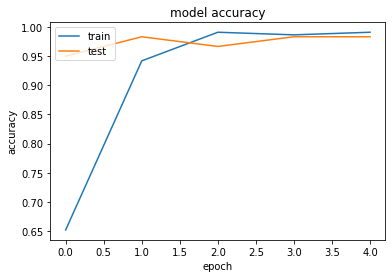

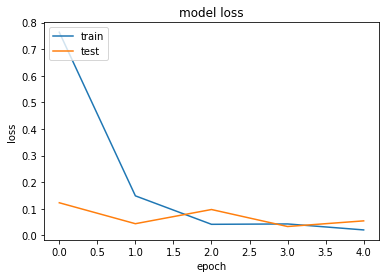

In [ ]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
label =test_gen.classes
pred= m6.predict(test_gen)
pred_class=np.argmax(pred, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(label,pred_class)
cf

array([[30,  0],
       [ 1, 29]])

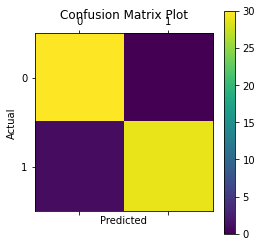

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [ ]:

import tensorflow as tf

from keras.models import load_model

m6.save('model1_vgg19.h5')